In [3]:
# import the required packages for the webscaping

pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [7]:
# taking the url of the scapper 
url = 'https://www.hubertiming.com/results/2018mlk'
html = urlopen(url)

In [9]:
# soup abject for the parser
soup = BeautifulSoup(html)

In [12]:
# printing the title of the site
title = soup.title
print(title)
print(title.text)

<title>2018 MLK Dream Run 5K Race Results</title>
2018 MLK Dream Run 5K Race Results


In [27]:
 # findout the all links here
links = soup.find_all('a', href = True )
for link in links:
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [30]:
# findout all the rows in site
allrows = soup.find_all('tr')
print(allrows[:5])

[<tr colspan="2"><b>5K:</b></tr>, <tr><td>Finishers:</td><td>191</td></tr>, <tr><td>Male:</td><td>78</td></tr>, <tr><td>Female:</td><td>113</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>]


In [35]:
# show all data
allrows = soup.find_all('tr')
for rows in allrows:
    row_list = rows.find_all('td')
print(row_list)
for call in row_list:
    print(call.text)

[<td>191</td>, <td>1216</td>, <td>ZULMA OCHOA</td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>1:43:27</td>, <td>33:22</td>, <td>113 of 113</td>, <td>F 40-54</td>, <td>37 of 37</td>, <td>0:00</td>, <td>1:43:27</td>]
191
1216
ZULMA OCHOA
F
40
GRESHAM
OR
1:43:27
33:22
113 of 113
F 40-54
37 of 37
0:00
1:43:27


In [45]:
# create data into the pandas

data = []
allrows = soup.find_all('tr')
for rows in allrows:
    row_list = rows.find_all('td')
    datarow = []
    for call in row_list:
        datarow.append(call.text)
    data.append(datarow)
title = data[1]
print(title)
data = data[1:]
print(data)

['Finishers:', '191']
[['Finishers:', '191'], ['Male:', '78'], ['Female:', '113'], [], ['1', '1191', 'MAX RANDOLPH', 'M', '29', 'WASHINGTON', 'DC', '16:48', '5:25', '1 of 78', 'M 21-39', '1 of 33', '0:08', '16:56'], ['2', '1080', 'NEED NAME KAISER RUNNER', 'M', '25', 'PORTLAND', 'OR', '17:31', '5:39', '2 of 78', 'M 21-39', '2 of 33', '0:09', '17:40'], ['3', '1275', 'DAN FRANEK', 'M', '52', 'PORTLAND', 'OR', '18:15', '5:53', '3 of 78', 'M 40-54', '1 of 27', '0:07', '18:22'], ['4', '1223', 'PAUL TAYLOR', 'M', '54', 'PORTLAND', 'OR', '18:31', '5:58', '4 of 78', 'M 40-54', '2 of 27', '0:07', '18:38'], ['5', '1245', 'THEO KINMAN', 'M', '22', '', '', '19:31', '6:17', '5 of 78', 'M 21-39', '3 of 33', '0:09', '19:40'], ['6', '1185', 'MELISSA GIRGIS', 'F', '27', 'PORTLAND', 'OR', '19:39', '6:20', '1 of 113', 'F 21-39', '1 of 53', '0:07', '19:46'], ['7', '1251', 'CHARLIE COGGESHALL', 'M', '39', 'PORTLAND', 'OR', '19:51', '6:24', '6 of 78', 'M 21-39', '4 of 33', '0:10', '20:01'], ['8', '1154', 'U

In [47]:
# into pandas 
df = pd.DataFrame(data)
print(df)

             0     1                         2     3     4            5   \
0    Finishers:   191                      None  None  None         None   
1         Male:    78                      None  None  None         None   
2       Female:   113                      None  None  None         None   
3          None  None                      None  None  None         None   
4             1  1191              MAX RANDOLPH     M    29   WASHINGTON   
5             2  1080   NEED NAME KAISER RUNNER     M    25     PORTLAND   
6             3  1275                DAN FRANEK     M    52     PORTLAND   
7             4  1223               PAUL TAYLOR     M    54     PORTLAND   
8             5  1245               THEO KINMAN     M    22                
9             6  1185            MELISSA GIRGIS     F    27     PORTLAND   
10            7  1251        CHARLIE COGGESHALL     M    39     PORTLAND   
11            8  1154  UNKNOWN RUNNER SEE TIMER     M                      
12          

In [58]:
# print the headers here  add into list
header_list = []
col_headers = soup.find_all('th')
for head in col_headers:
    header_list.append(head.text)
print(header_list)
    

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [59]:
# giving the those headers into the df
df.columns = header_list

In [62]:
# print first 10 rows in a dataset
df.head(10)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,Finishers:,191,None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,78,None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,113,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
5,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
6,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
7,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
8,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40
9,6,1185,MELISSA GIRGIS,F,27,PORTLAND,OR,19:39,6:20,1 of 113,F 21-39,1 of 53,0:07,19:46


In [64]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
Place              194 non-null object
Bib                194 non-null object
Name               191 non-null object
Gender             191 non-null object
Age                191 non-null object
City               191 non-null object
State              191 non-null object
Chip Time          191 non-null object
Chip Pace          191 non-null object
Gender Place       191 non-null object
Age Group          191 non-null object
Age Group Place    191 non-null object
Time to Start      191 non-null object
Gun Time           191 non-null object
dtypes: object(14)
memory usage: 21.4+ KB


In [65]:
# shape of the data
df.shape

(195, 14)

In [67]:
# drop if any value is 0
df2 = df.dropna(how = 'any')
df2.shape

(191, 14)

Text(0, 0.5, 'Gender')

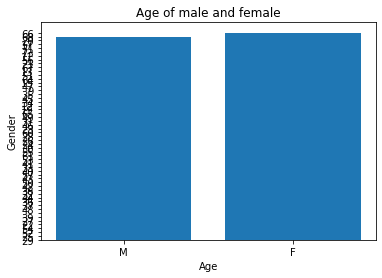

In [74]:
plt.bar(df2['Gender'], df2['Age'])
plt.title('Age of male and female')
plt.xlabel('Age')
plt.ylabel('Gender')

In [75]:
df2.describe()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
count,191,191,191,191,191,191,191,191,191,191,191,191,191,191
unique,191,191,190,2,55,22,6,170,152,191,9,191,45,178
top,75,1241,UNKNOWN RUNNER SEE TIMER,F,,PORTLAND,OR,28:32,9:28,110 of 113,F 21-39,8 of 27,0:26,42:17
freq,1,1,2,113,9,130,149,2,4,1,53,1,8,2
